In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
plt.style.use('ggplot')

df = pd.read_csv("C:/Users/HP/Downloads/train_dataset_final1.csv")
df.describe()


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [3]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

We have some missing values in the age column.So we can replace them with the mean of the remaining values.
Also we can change the datatype of age column to int64.

In [7]:
df['age'] = df['age'].fillna(value=df['age'].mean())
df['age'] = df['age'].astype('int64')
df[['marriage','sex','education']] = df[['marriage','sex','education']].astype('object')
df=df.drop(columns=['Customer_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  object 
 1   sex                 25247 non-null  object 
 2   education           25247 non-null  object 
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25247 non-null  int64  
 5   pay_0               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

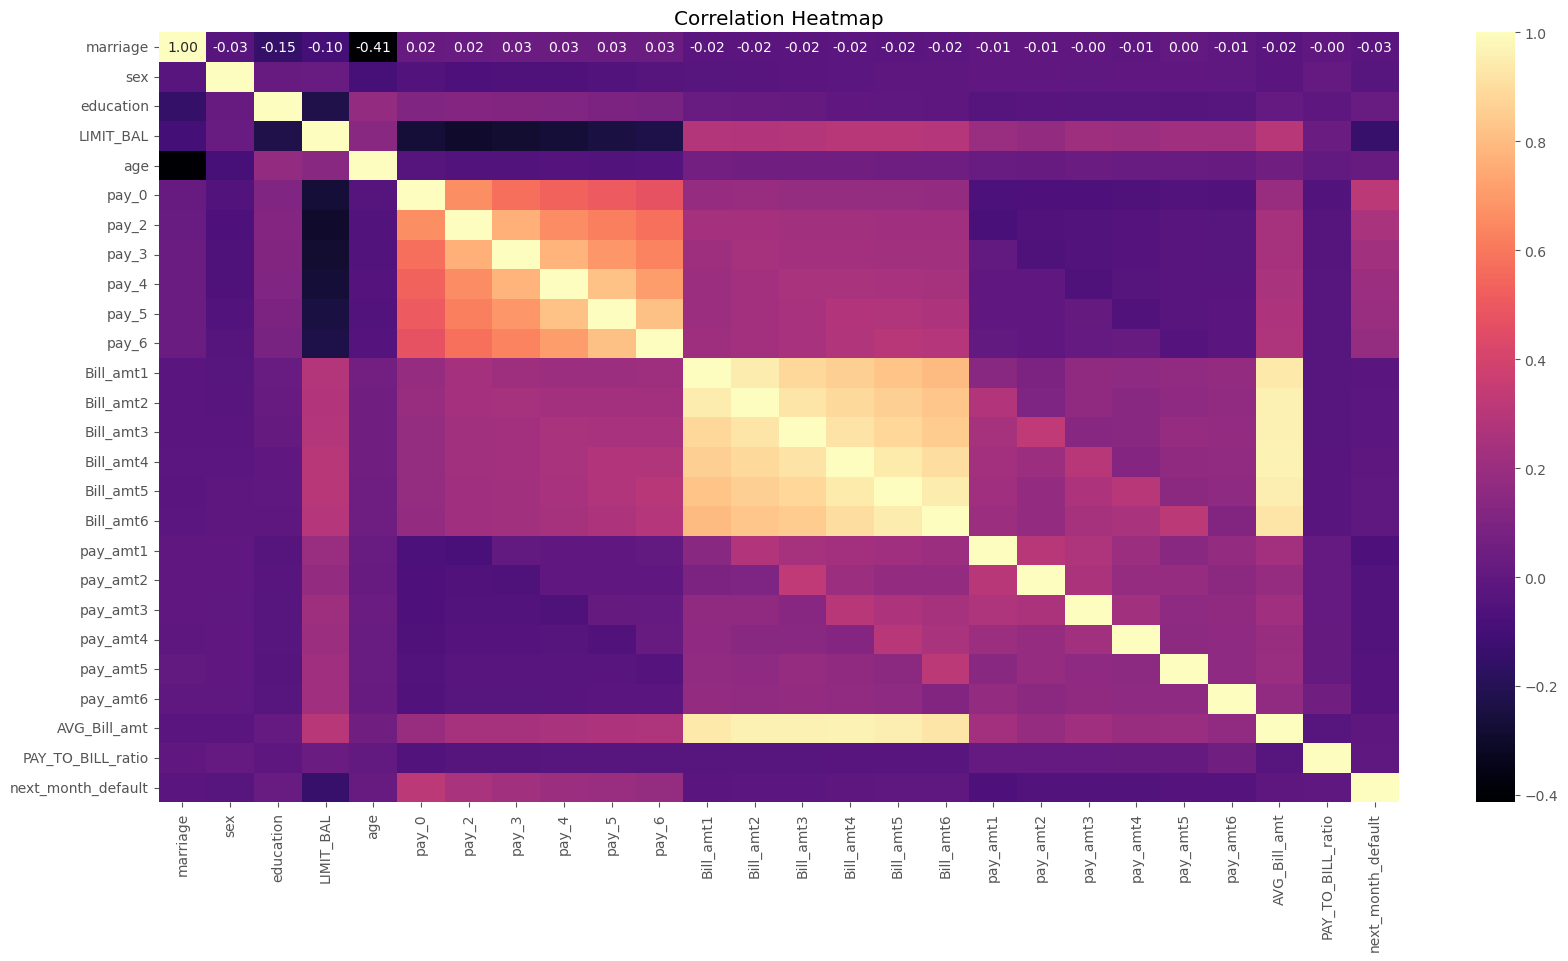

In [8]:
#EDA
#Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows a strong correlation among the payment variables(pay_0,pay_2,pay_3,pay_4,pay_5,pay_6) and billing amount variables(bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6).the strong correlation among payment variables shows that the payments deliquency is persistent.So if a customer misses payment in the inital months then he is likely to miss payments in the subsequent months as well.

Also the strong correlation among billing_amount variables suggests that customers maintain a consistent spending pattern over time.

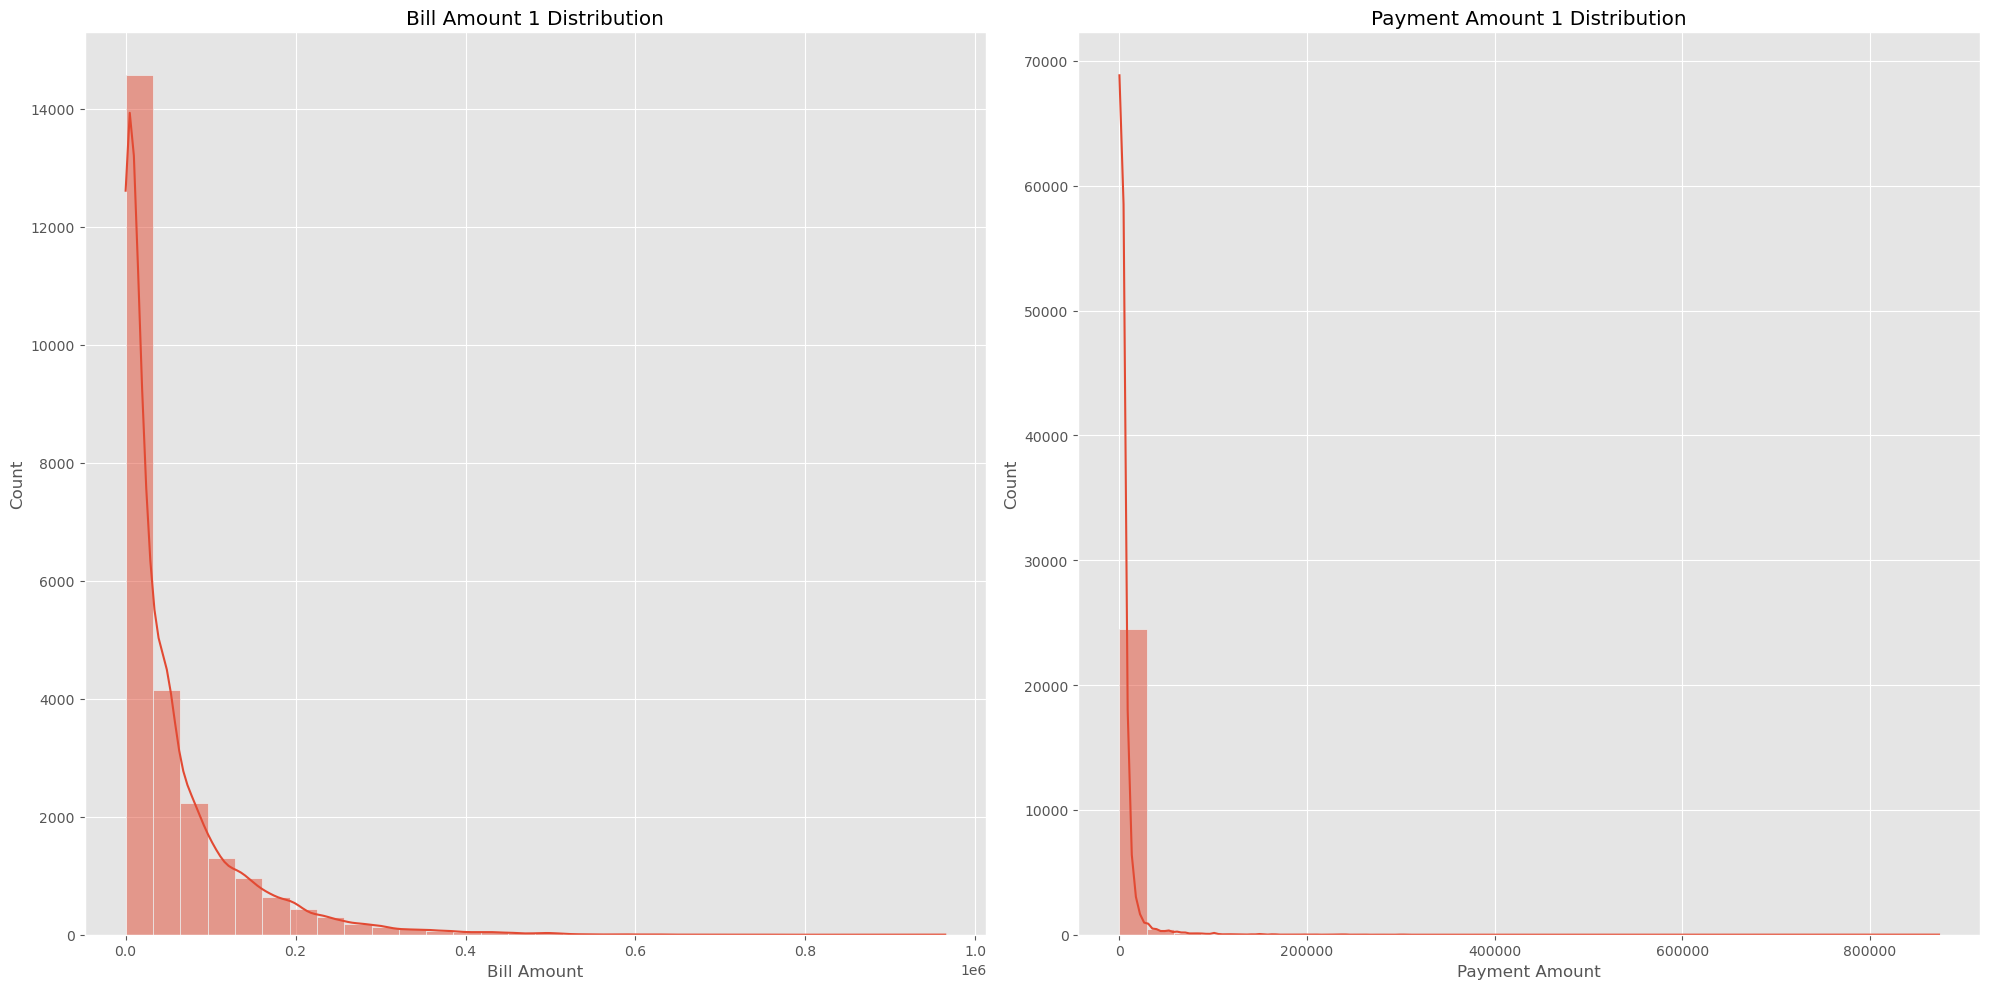

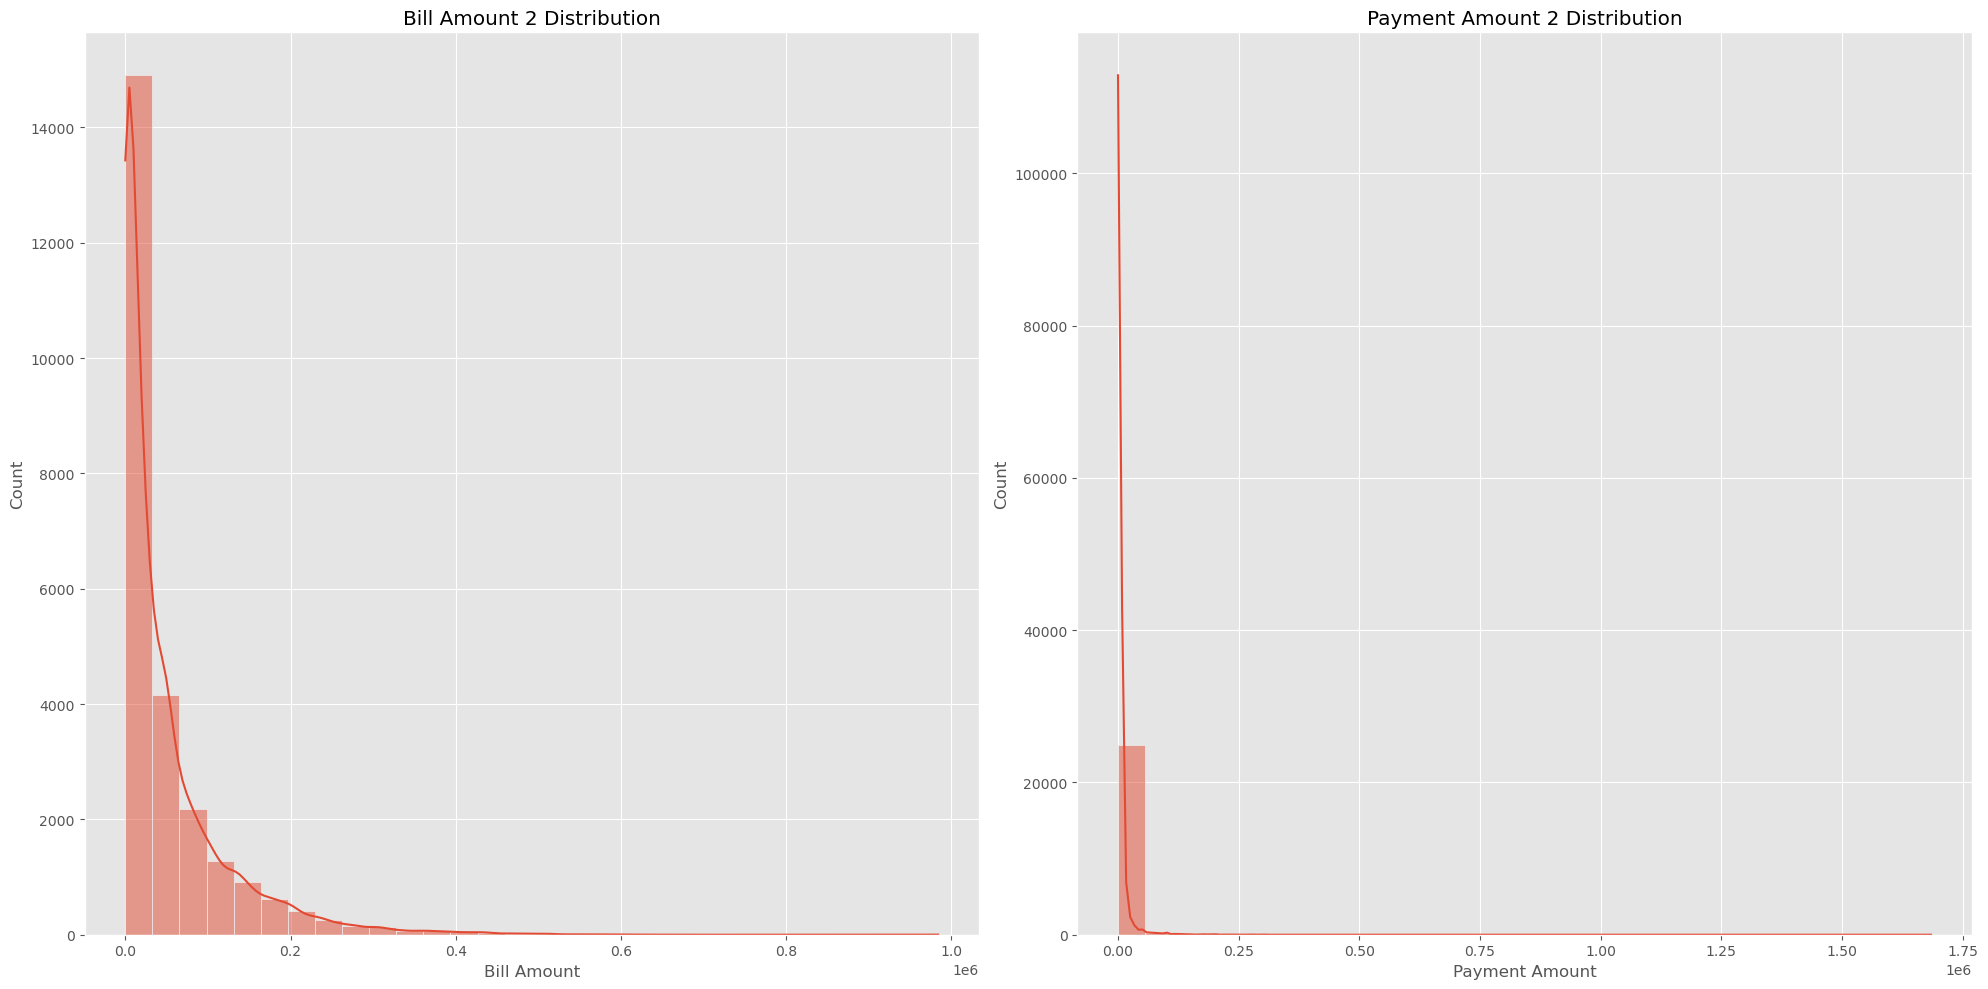

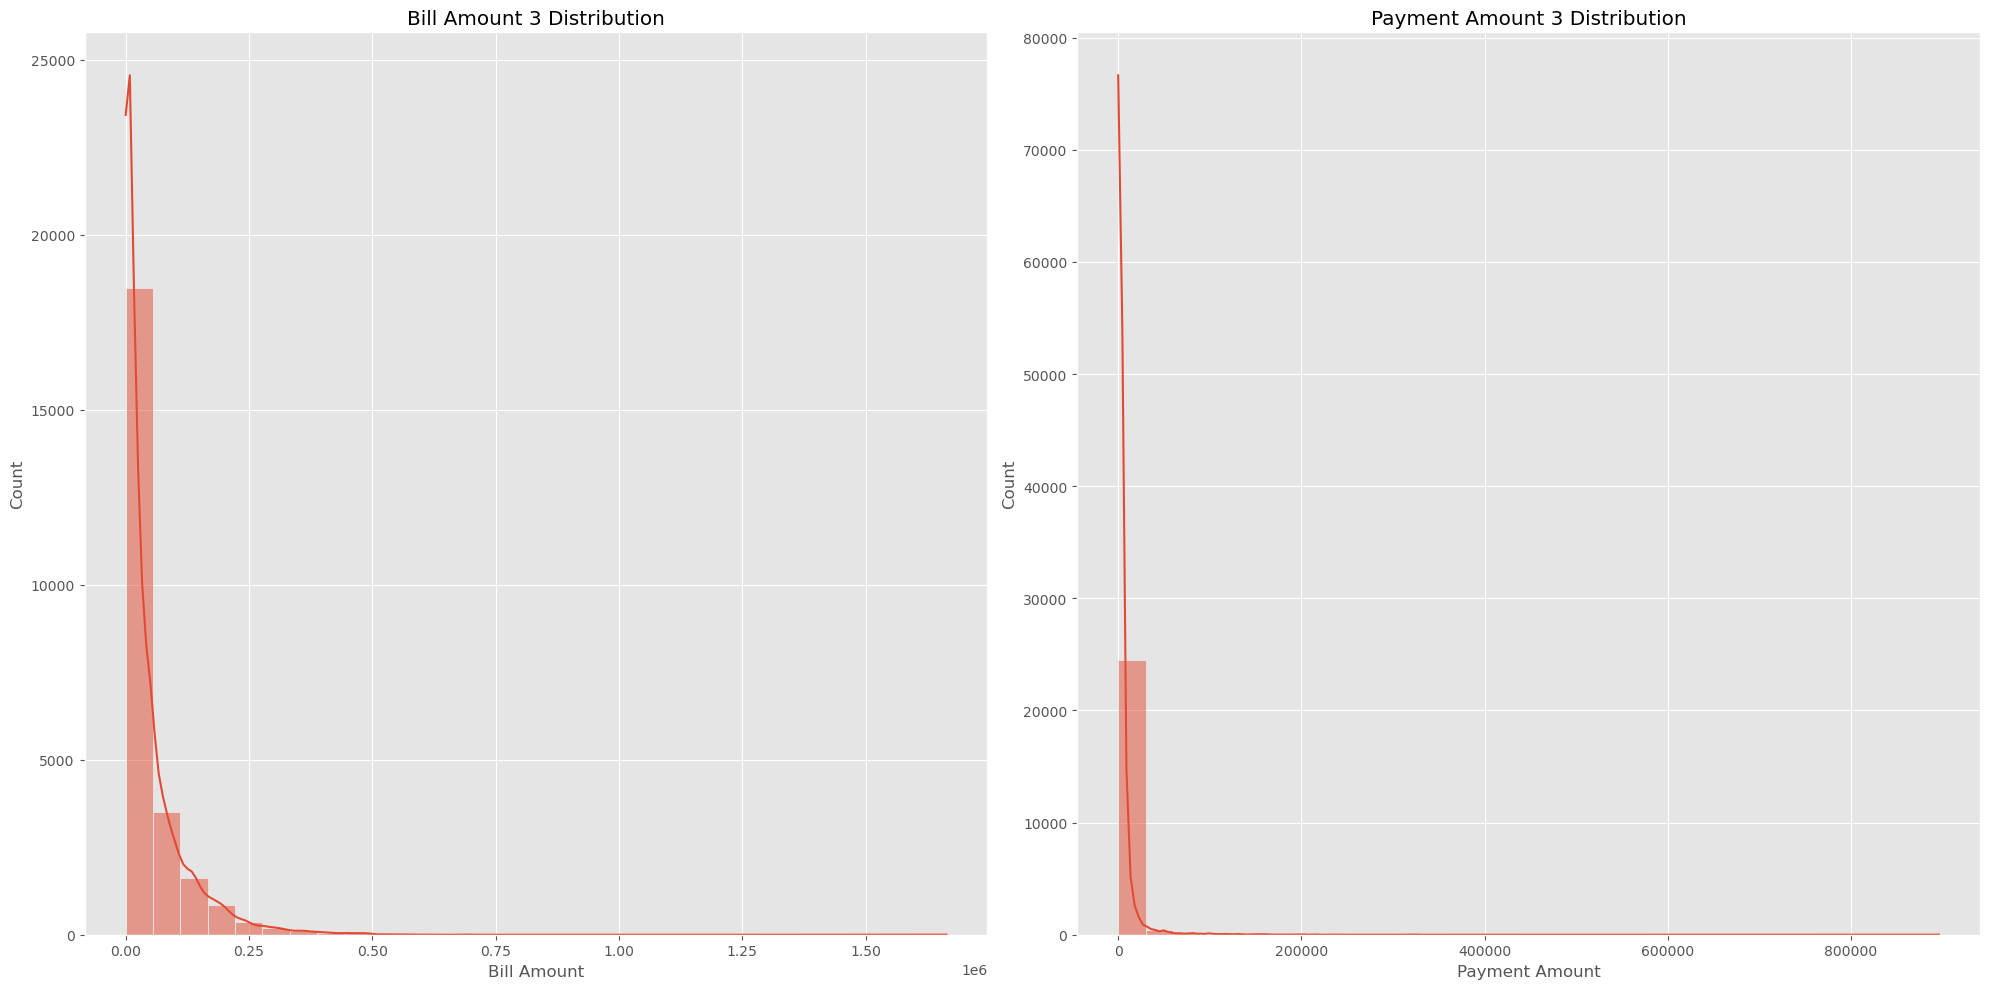

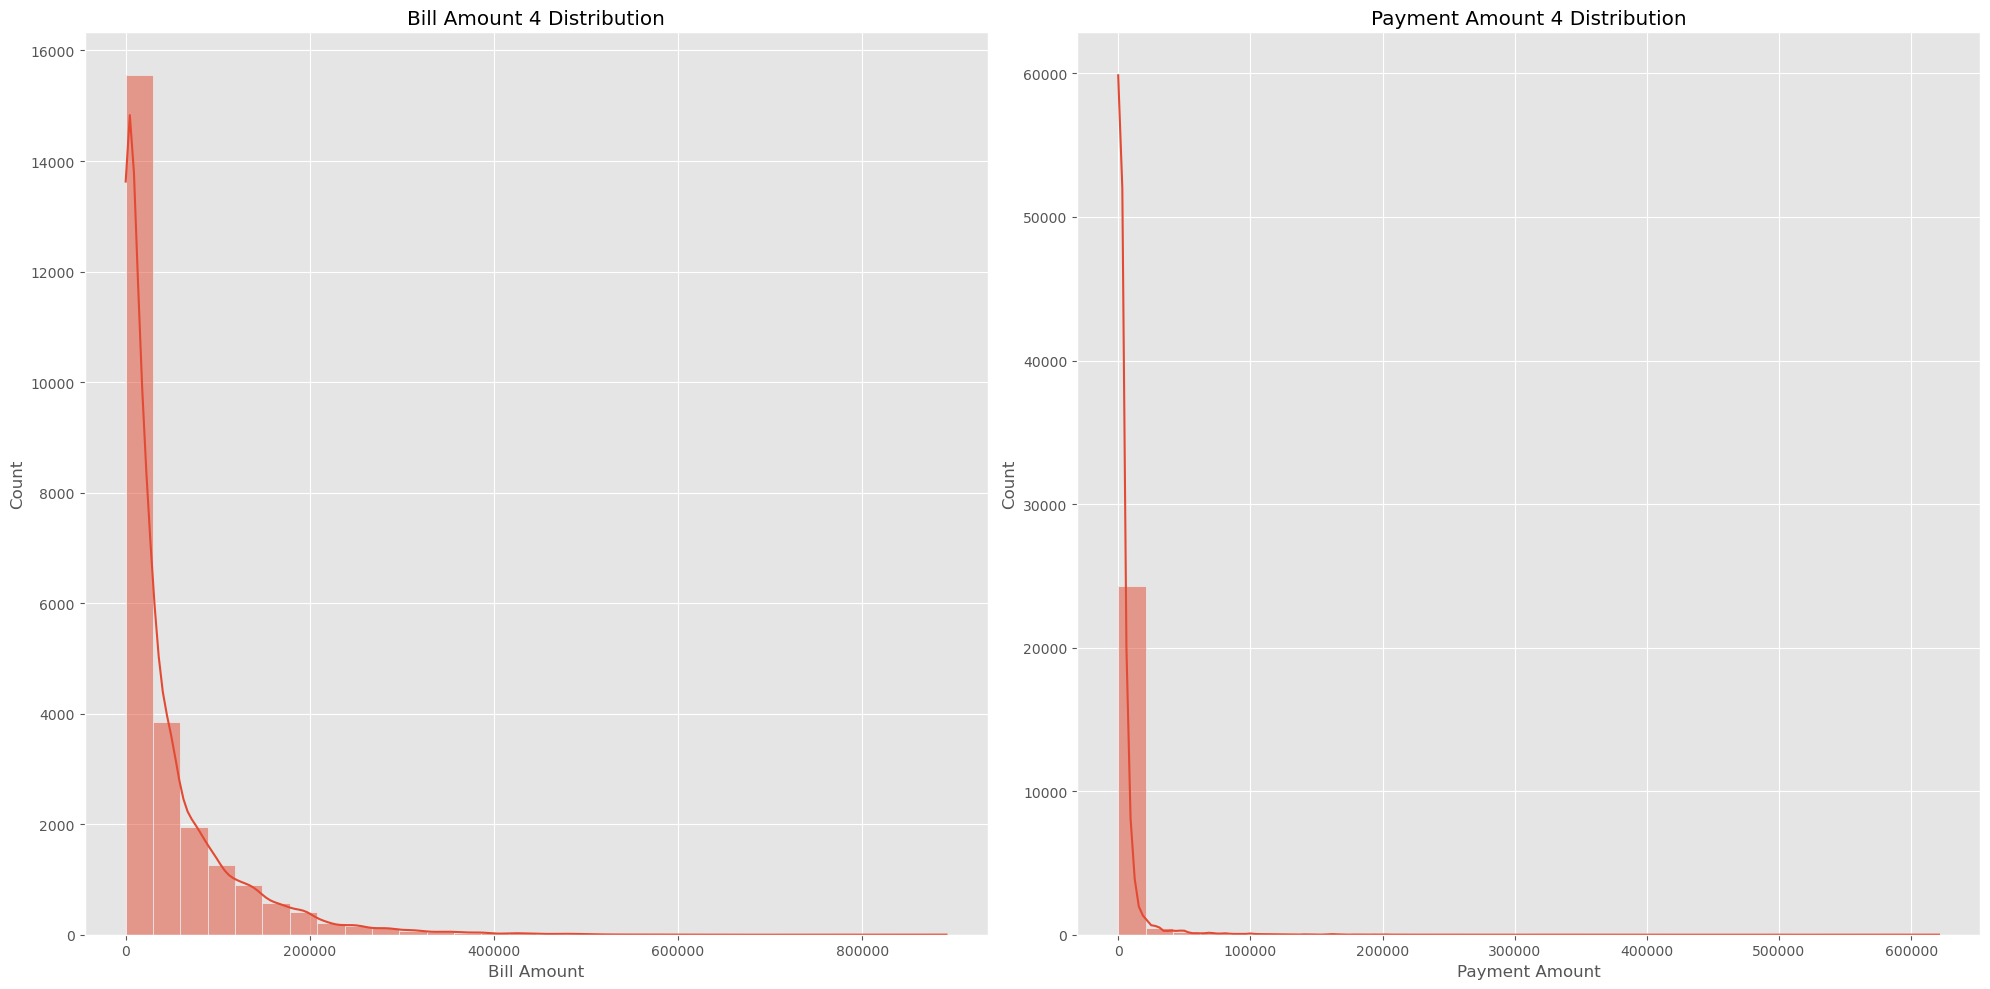

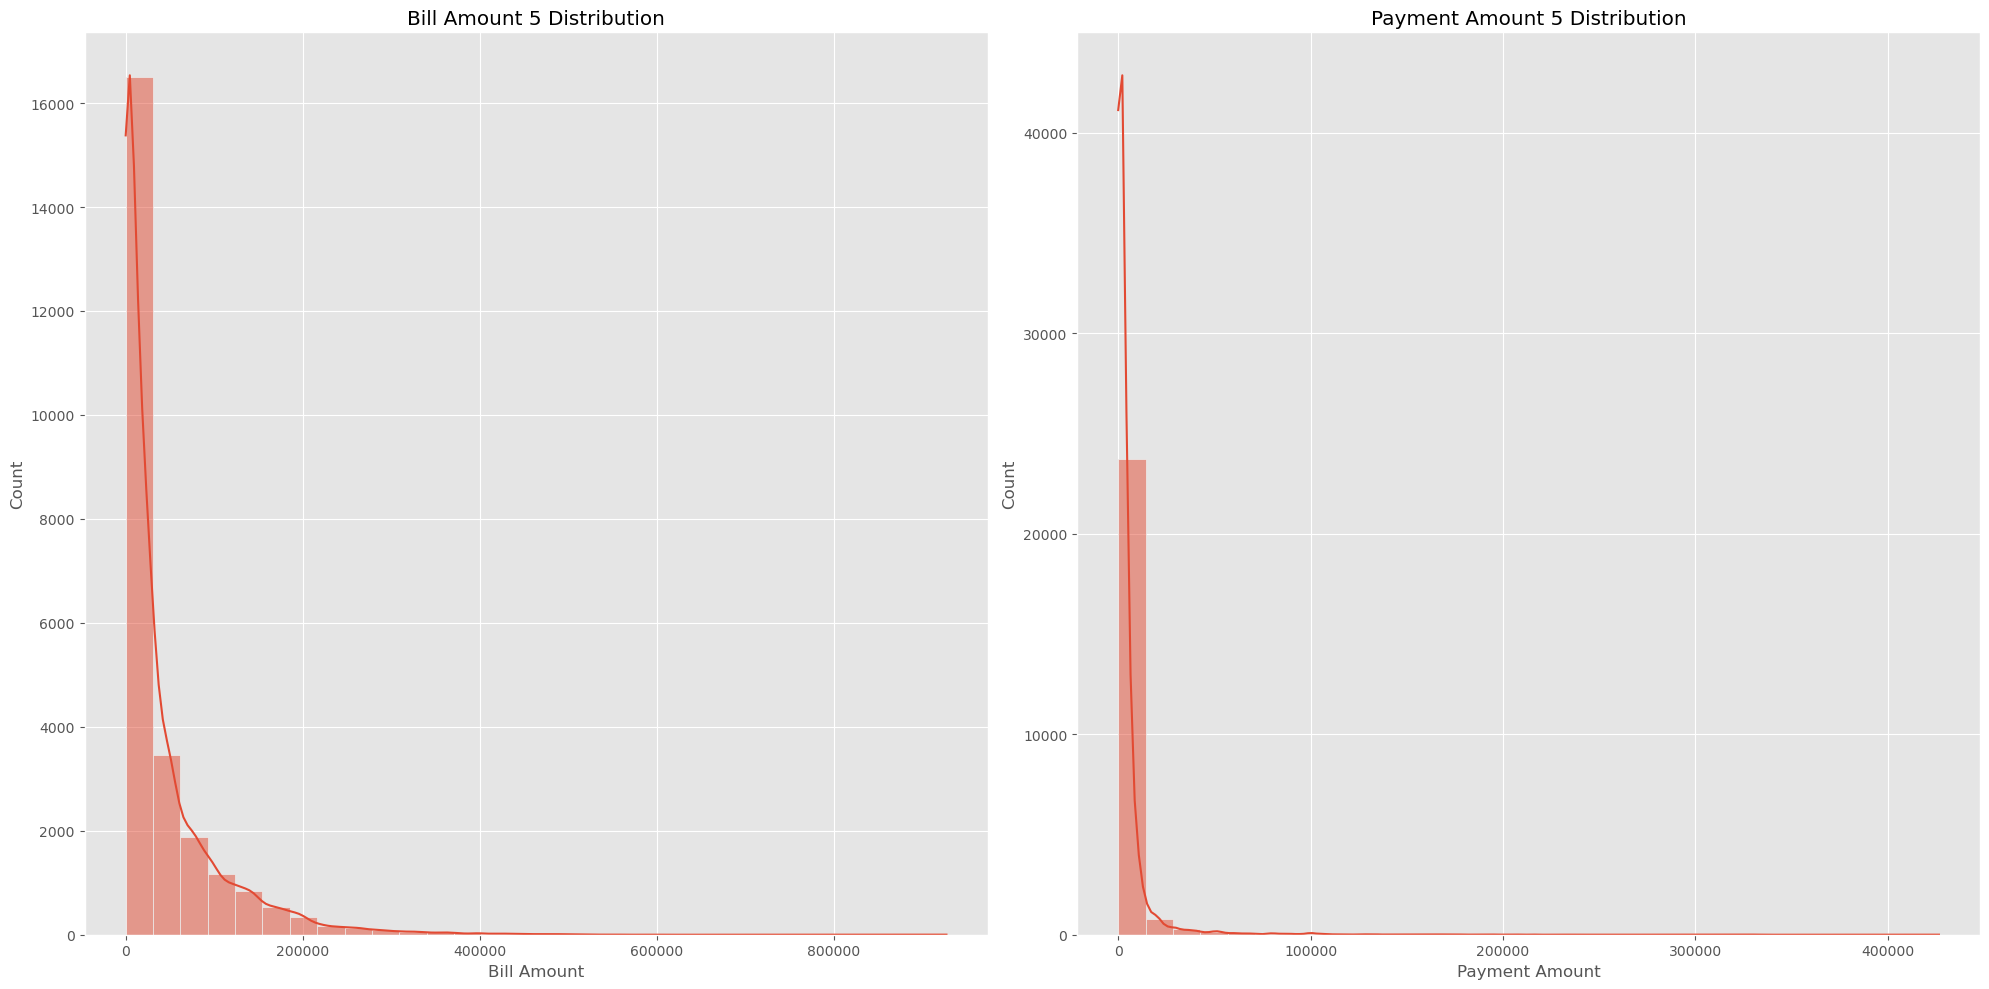

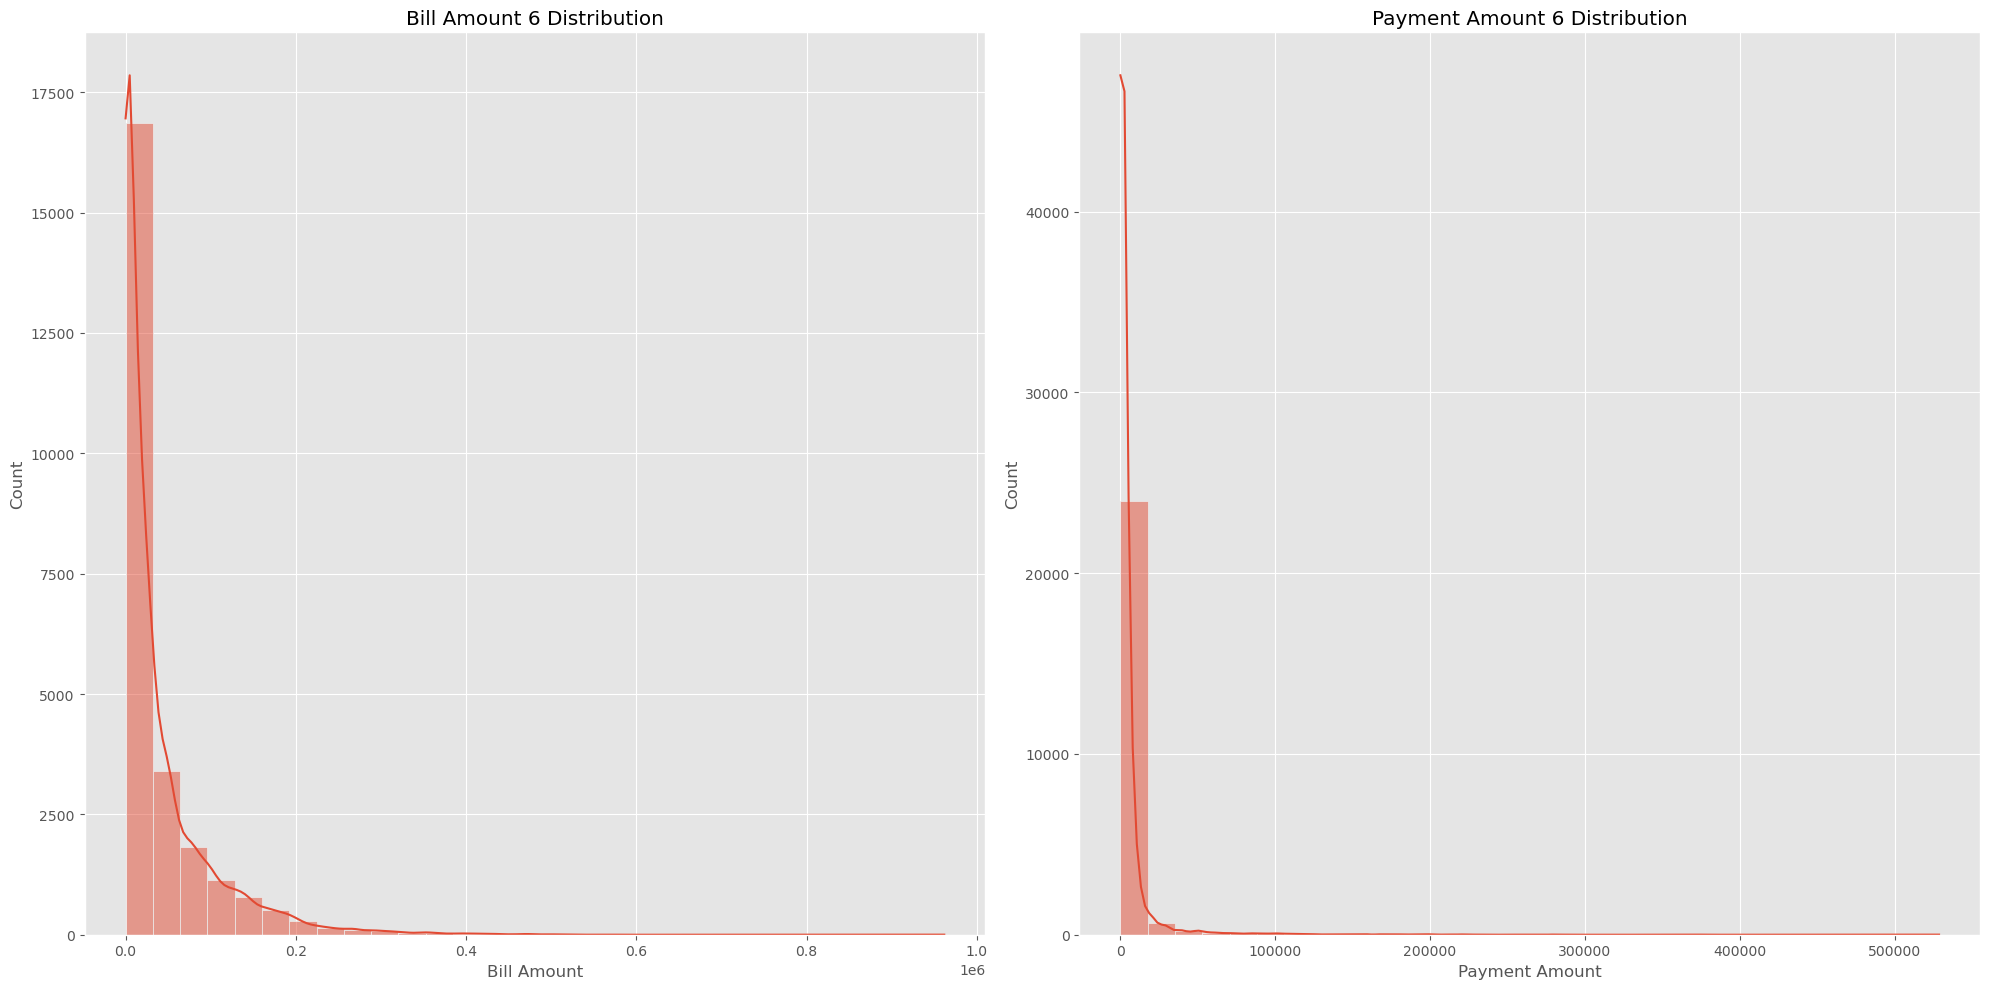

In [9]:
import warnings
warnings.filterwarnings("ignore")
for i in range(1, 7):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'Bill_amt{i}'], bins = 30, kde = True)
    plt.title(f'Bill Amount {i} Distribution')
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'pay_amt{i}'], bins = 30, kde = True)
    plt.title(f'Payment Amount {i} Distribution')
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

the billing_amount and paymennt_amount distributions are heavily right skewed suggesting that there is large chunk of customers having relatively small balances and payments.Also the spikes at zero in payment_amount across various months indicate that the customers miss or make partial payments for the previous month marking them as a red flag fro default risk.The payment distribution is more concentrated near zero than bill distribution suggesting that the customers are accumulating debt faster than they are paying it off.

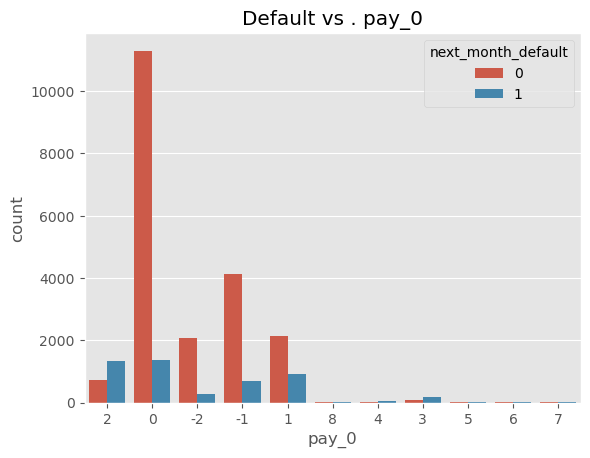

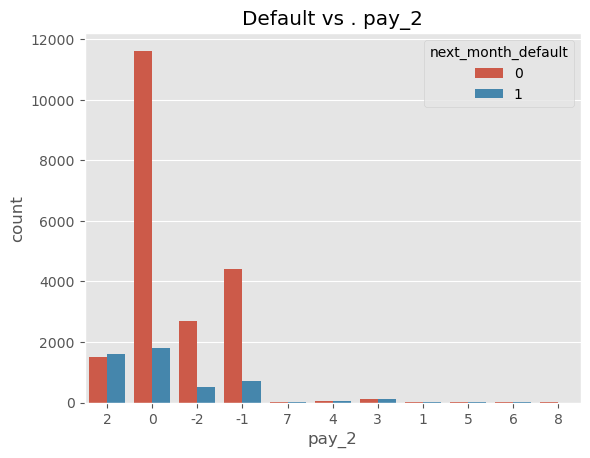

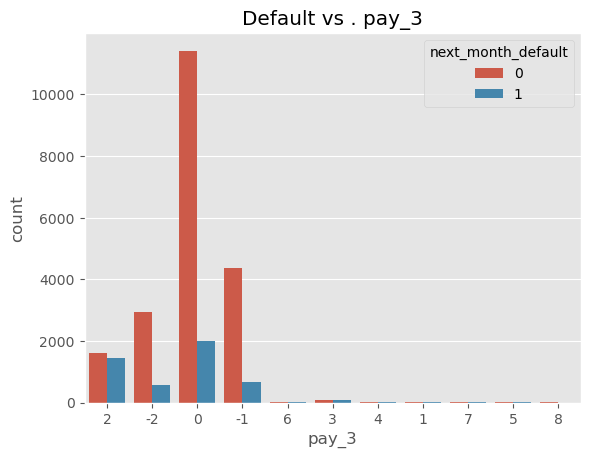

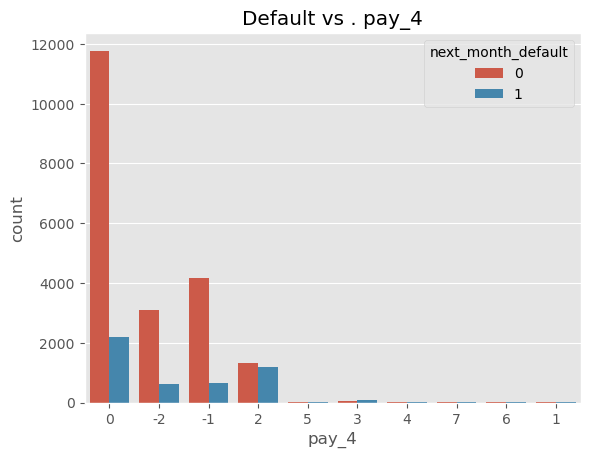

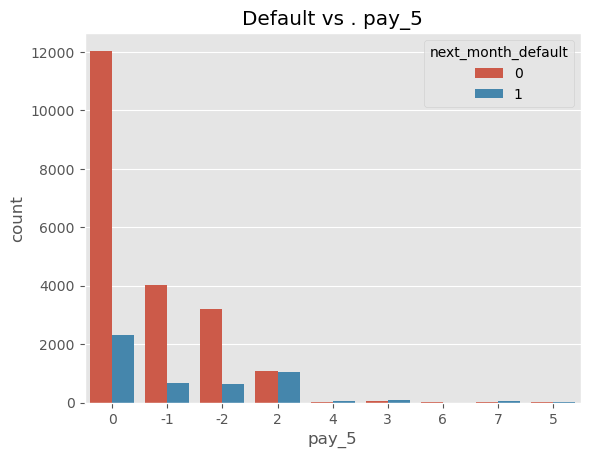

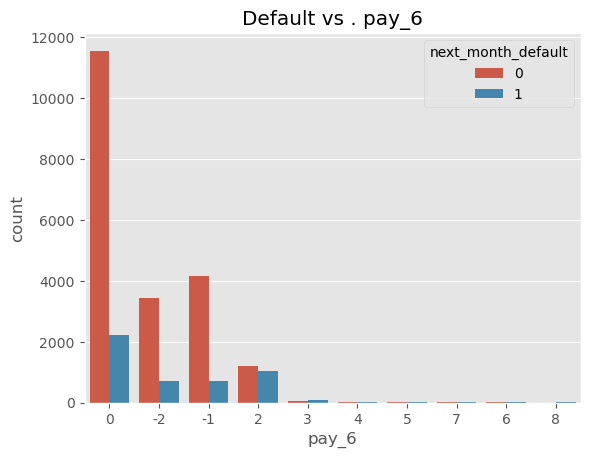

In [10]:
payment_history_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in payment_history_columns:
    sns.countplot(x=df[col].astype(str),hue=df['next_month_default'].astype(str), data = df)
    plt.title(f'Default vs . {col}')
    plt.show()

in the inital months(pay_0,pay_2,pay_3), the sharp distinction between various categories like paid duly(-1),partial payment(0) suggests that any deviation from on time payment significantly increases deafult risk

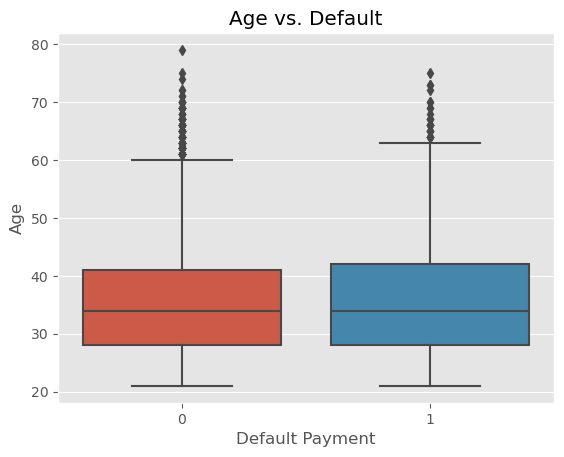

In [11]:
sns.boxplot(x = 'next_month_default', y = 'age', data = df)
plt.title('Age vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('Age')
plt.show()

the box plot suggests that age is not a strong default predictor. The boxplots for the 2 classes overlap significantly suggesting that default risk exists over all demographics.

So,credit decisions should prioritize financial behavior over demographic characteristics.

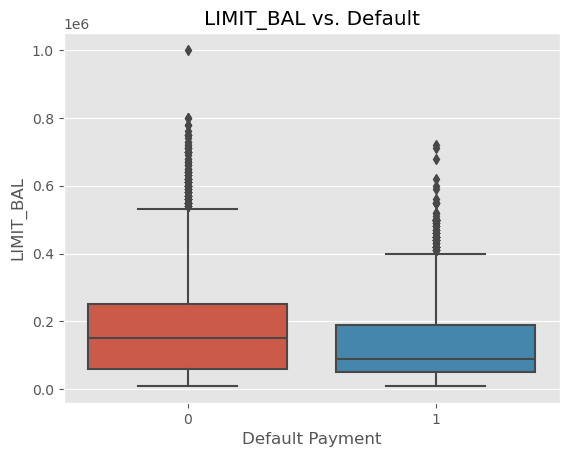

In [12]:
sns.boxplot(x = 'next_month_default', y = 'LIMIT_BAL', data = df)
plt.title('LIMIT_BAL vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('LIMIT_BAL')
plt.show()

the median of limit_balance for non defaulters is almost double than that for deafulters(default_payment=1).This suggests that credit limit is higher for the creditworthy customers.Also this seperation between the 2 classes shows that credit_limit itself is a strong default risk predictor as it is assigned based on the credit score of the customers.

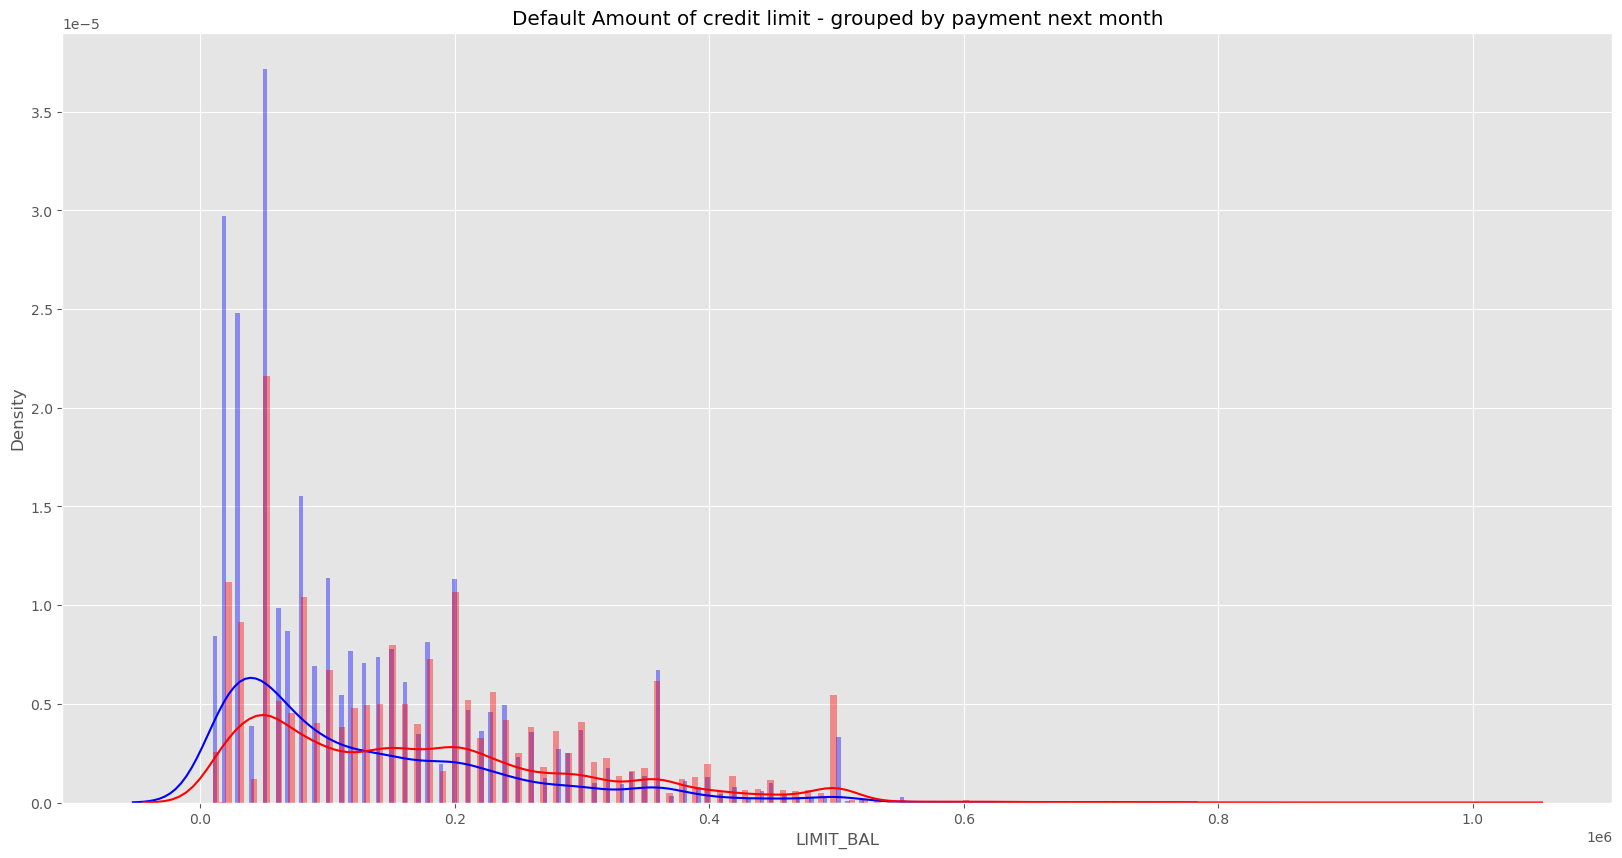

In [13]:
import warnings
warnings.filterwarnings("ignore")
class_0 = df.loc[df['next_month_default'] ==  0]['LIMIT_BAL']
class_1 = df.loc[df['next_month_default'] ==  1]['LIMIT_BAL']

plt.figure(figsize = (20,10))
plt.title('Default Amount of credit limit - grouped by payment next month')
sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
sns.distplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()

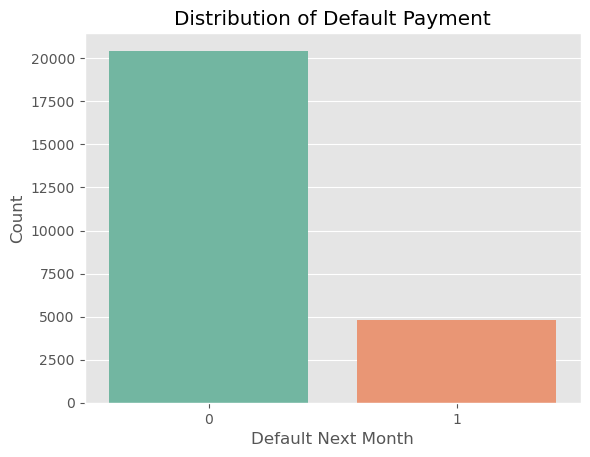

In [14]:
sns.countplot(x='next_month_default', data=df, palette='Set2') 
plt.title('Distribution of Default Payment')
plt.xlabel('Default Next Month')
plt.ylabel('Count')
plt.show()

There is a significant class imbalance between the 2 classes which can affect the performance of our model

FEATURE ENGINEERING

In [15]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

#deliquency count
df["deliquency_count"] = df[[f"pay_{i}" for i in [0,2,3,4,5,6]]].apply(lambda row: sum(row > 0), axis=1)

#max and avg delay in credit payments
df["max_delay"] = df[[f"pay_{i}" for i in [0,2,3,4,5,6]]].max(axis=1)

#transformation of bill amount and pay amount columns

df['avg_pay_amt'] = df[[f'pay_amt{i}' for i in range(1,7)]].mean(axis=1)
df['utilization_ratio'] = df['AVG_Bill_amt'] / (df['LIMIT_BAL'] + 1)



In [16]:
df.info

<bound method DataFrame.info of       marriage sex education  LIMIT_BAL  age  pay_0  pay_2  pay_3  pay_4  \
0            2   0         2      60000   25      2      2      2      0   
1            2   1         1     290000   24      0      0     -2     -2   
2            1   0         2     180000   63      0      0      0      0   
3            1   1         2     210000   43      0      0      0      0   
4            2   0         1     280000   32     -2     -2     -2     -2   
...        ...  ..       ...        ...  ...    ...    ...    ...    ...   
25242        1   1         2      90000   33      0      0      0      0   
25243        1   0         2      60000   49      0      0      0      0   
25244        2   0         1     120000   31     -1     -1     -1     -1   
25245        1   1         4     390000   40      0      0      0      0   
25246        1   1         2     160000   58     -1     -1     -1     -1   

       pay_5  ...  pay_amt4  pay_amt5  pay_amt6  AVG_Bi

In [17]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score

# Step 1: Split original imbalanced data
X = df.drop('next_month_default', axis=1)
y = df['next_month_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Balance ONLY the training set
# Combine X_train and y_train for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
df_majority = train_df[train_df['next_month_default'] == 0]
df_minority = train_df[train_df['next_month_default'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine downsampled majority with minority
df_train_balanced = pd.concat([df_majority_downsampled, df_minority])
df_train_balanced = df_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

#Separate features and target again
X_train_bal = df_train_balanced.drop('next_month_default', axis=1)
y_train_bal = df_train_balanced['next_month_default']

# Step 4: Create and fit pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000))
])

pipeline.fit(X_train_bal, y_train_bal)

# Step 5: Predict with threshold
y_prob = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = (y_prob >= threshold).astype(int)

# Step 6: Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)


Accuracy: 0.6760396039603961
Confusion Matrix:
 [[2724 1364]
 [ 272  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      4088
           1       0.34      0.72      0.46       962

    accuracy                           0.68      5050
   macro avg       0.62      0.69      0.61      5050
weighted avg       0.80      0.68      0.71      5050

f2 score:
 0.5845476109793291


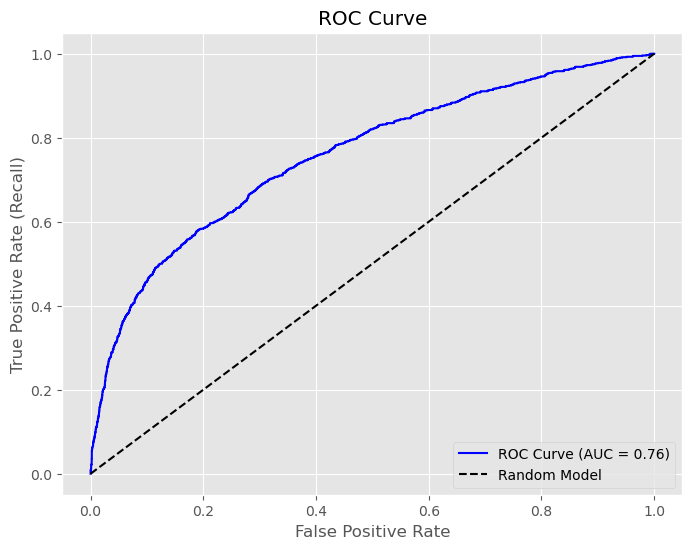

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test)[:, 1]

#calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 2: Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  
    ('model', DecisionTreeClassifier(random_state=42)) ])

# Fit model
pipeline.fit(X_train_bal, y_train_bal)

# Predict
y_prob = pipeline.predict_proba(X_test)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

Accuracy: 0.6316831683168317
Confusion Matrix:
 [[2558 1530]
 [ 330  632]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.73      4088
           1       0.29      0.66      0.40       962

    accuracy                           0.63      5050
   macro avg       0.59      0.64      0.57      5050
weighted avg       0.77      0.63      0.67      5050

f2 score:
 0.5257903494176372


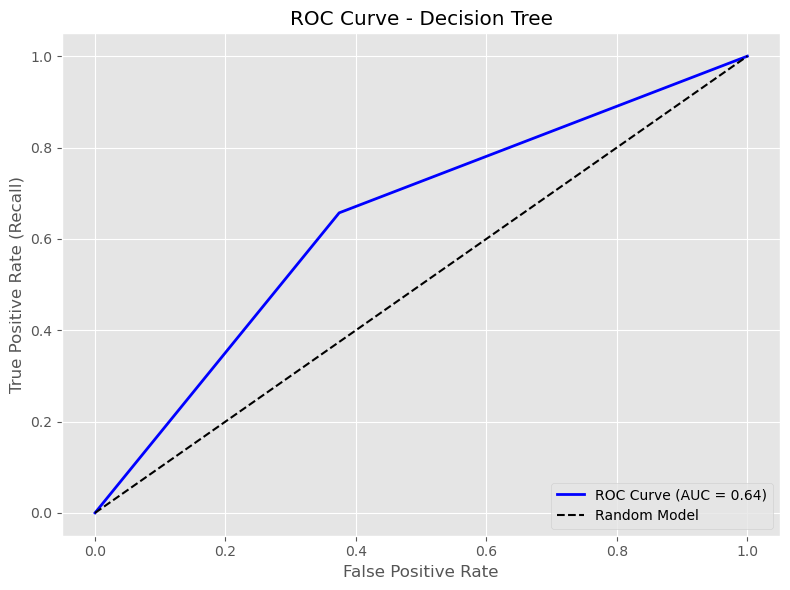

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities (for the positive class)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
!pip install xgboost

In [21]:
#XG BOOST
from xgboost import XGBClassifier
# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # Still useful for some numeric stability
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit model
pipeline.fit(X_train_bal, y_train_bal)

# Predict
y_prob = pipeline.predict_proba(X_test)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

Accuracy: 0.64
Confusion Matrix:
 [[2513 1575]
 [ 243  719]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      4088
           1       0.31      0.75      0.44       962

    accuracy                           0.64      5050
   macro avg       0.61      0.68      0.59      5050
weighted avg       0.80      0.64      0.68      5050

f2 score:
 0.5853142298925431


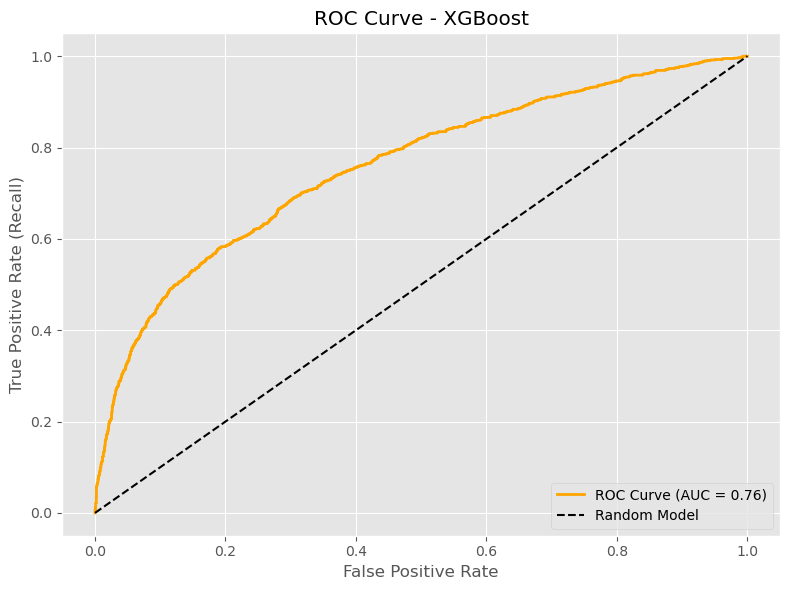

In [26]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
!pip install lightgbm

In [23]:
from lightgbm import LGBMClassifier

pipeline_lgbm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # optional for tree models
    ('model', LGBMClassifier(random_state=42))
])

# Fit model
pipeline_lgbm.fit(X_train_bal, y_train_bal)

# Predict
y_prob = pipeline_lgbm.predict_proba(X_test)[:, 1]
threshold=0.40
y_pred = (y_prob >= threshold).astype(int)

# Evaluate performance
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("f2 score:\n", f2_score)

[LightGBM] [Info] Number of positive: 3845, number of negative: 3845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4288
[LightGBM] [Info] Number of data points in the train set: 7690, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.640990099009901
Confusion Matrix:
 [[2492 1596]
 [ 217  745]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      4088
           1       0.32      0.77      0.45       962

    accuracy                           0.64      5050
   macro avg       0.62      0.69      0.59      5050
weighted avg       0.81      0.64      0.68      5050

f2 score:
 0.6018742931006624


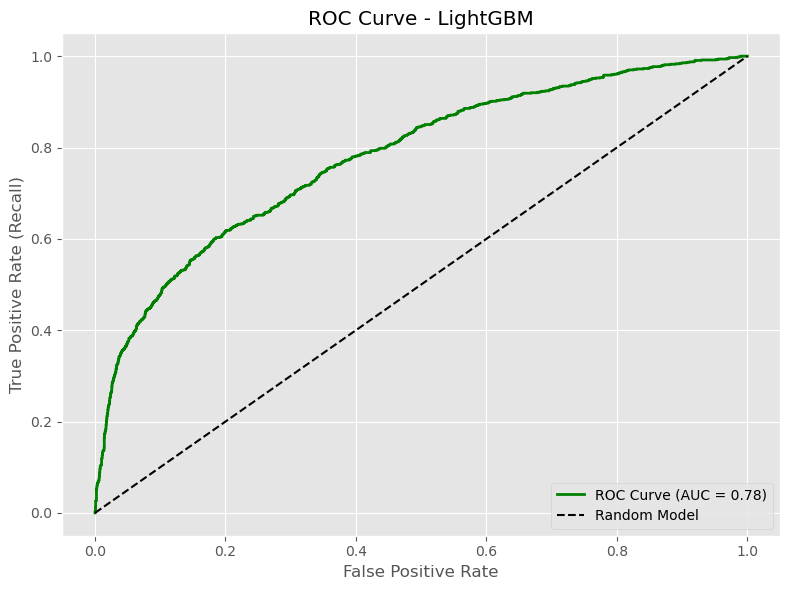

In [25]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')  # Diagonal line for baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

BASED ON THE PERFORMANCE I HAVE CHOSEN LIGHTGBM MODEL

In [28]:
val_df=pd.read_csv("C:/Users/HP/Downloads/validate_dataset_final.csv")
X_val=val_df
customer_ids=X_val['Customer_ID']

X_val_features = X_val.drop(columns=['Customer_ID'])
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

X_val_features["deliquency_count"] = X_val_features[[f"pay_{i}" for i in [0,2,3,4,5,6]]].apply(lambda row: sum(row > 0), axis=1)
X_val_features["max_delay"] = X_val_features[[f"pay_{i}" for i in [0,2,3,4,5,6]]].max(axis=1)
X_val_features['avg_pay_amt'] = X_val_features[[f'pay_amt{i}' for i in range(1,7)]].mean(axis=1)
X_val_features['utilization_ratio'] = X_val_features['AVG_Bill_amt'] / (df['LIMIT_BAL'] + 1)

y_val_pred=pipeline_lgbm.predict(X_val_features)

submission_df= submission_df = pd.DataFrame({
    'Customer': customer_ids,
    'next_month_default': y_val_pred.astype(int)  
})

submission_df.to_csv('C:/Users/HP/Downloads/submission_23115028.csv', index=False)